In [ ]:
# colab 환경에서 github 데이터셋 사용하기 
!wget https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
!unzip master.zip
!mv deep-learning-with-python-notebooks-master/datasets ./

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9115_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9116_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9117_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9118_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9119_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/911_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9120_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9121_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsup/9122_0.txt  
  inflating: deep-learning-with-python-notebooks-master/datasets/aclImdb/train/unsu

### 2.1 신경망과의 첫 만남

In [ ]:
# mnist 데이터셋 적재
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

전체 과정 : 훈련데이터 `train_images`와 `train_labels`를 네트워크에 주입한다. 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습되고, 마지막으로 `test_images`에 대한 예측을 네트워크에 요청한다. 그리고 이 예측이 `test_lables`와 맞는지 확인한다.

- `층(layer)` : 신경망의 핵심 구성 요소, 주어진 문제에 대해 더 의미 있는 `표현(expresentation)`을 입력된 데이터로부터 추출함.
- 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있음.
- 아래의 예는 조밀하게 연결된(`완전 연결(fully connected)된`) 신경망 층인 dense 층 2개가 연속되어 있다. 두 번째 층은 10개의 확률 점수가 들어있는 배열(모두 더하면 1)을 반환하는 `소프트맥스(softmax)`층이다.

In [ ]:
# 신경망 생성
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,))) # 1st Dense
network.add(layers.Dense(10, activation = 'softmax')) # 2nd Dense

- 신경망 훈련을 위해 컴파일 단계에 포함되어야 하는 세 가지 요소
  - `손실 함수(loss function)` : 훈련데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줌.
  - `옵티마이저(optimizer)` : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘.
  - '훈련과 테스트 과정을 모니터링할 지표`

In [ ]:
# 컴파일 단계
network.compile(optimizer = 'rmsprop', # 미니 배치 확률적 경사 하강법
                loss = 'categorical_crossentropy',  # 손실 함수
                metrics = ['accuracy']) # 성능 지표

- 데이터 전처리
  - 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정함.
  - 신경망은 입력 데이터의 스케일에 민감하여 적절한 데이터 전처리 과정이 필요하다. 이미지의 경우 보통 픽셀의 최댓값인 255로 나누어 사용한다.

In [ ]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

- from keras.utils import to_categorical 오류
  - TF 2.0부터 tensorflow로 이동됨. 아래의 코드로 사용해야 함

In [ ]:
# 레이블 준비하기
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- 모델 훈련
  - 모델을 훈련하는 동안 훈련데이터에 대한 네트워크의 손실과 정확도가 출력된다. 
  - 훈련데이터에 대해 98.86%, 테스트데이터에 대해 97.89%의 차이를 보인다. 
  - `과대적합(overfitting)` : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향.

In [ ]:
# 모델 훈련
network.fit(train_images, train_labels, epochs = 5, batch_size = 128) # 5 epoch

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2574 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1047 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0686 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0505 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0380 - accuracy: 0.9886


In [ ]:
# test set에서의 성능 측정
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9789


In [ ]:
test_loss

0.06738533824682236

In [ ]:
test_acc

0.9789000153541565

### 2.2 신경망을 위한 데이터 표현

- `텐서(tensor)` : 머신러닝의 기본 구성 요소, 데이터를 위한 컨테이너(container), 임의의 차원 개수를 가지는 행렬의 일반화된 모습 (텐서에서는 차원(dimension)을 종종 축(axis)이라고 부른다.)

- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있다.
- `랭크(rank)` : 텐서의 축 개수

#### 2.2.1 스칼라 (0D텐서)
- 하나의 숫자만 담고 있는 텐서 = `스칼라(scalar)`

#### 2.2.2 벡터 (1D텐서)
- 숫자의 배열 = `벡터(vector)`

#### 2.2.3 행렬 (2D텐서)
- 벡터의 배열 = `행렬(matrix)`
- 행: 첫 번째 축에 놓여 있는 원소
- 열: 두 번째 축에 놓여 있는 원소

#### 2.2.4 3D텐서와 고차원 텐서
- 행렬을 새로운 배열로 합친것


In [ ]:
# 스칼라
import numpy as np
x = np.array(12)
print(x.ndim)
x

0


array(12)

In [ ]:
# 벡터
x = np.array([12, 3, 6, 14, 7])
print(x.ndim)
x

1


array([12,  3,  6, 14,  7])

In [ ]:
# 행렬
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1], 
              [7, 80, 4, 36, 2]])
print(x.ndim)
x

2


array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
# 3d 텐서
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1], 
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1], 
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1], 
              [7, 80, 4, 36, 2]]])
print(x.ndim)
x

3


array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

#### 2.2.5 핵심 속성
- 축의 개수(rank) : ndim 속성으로 확인가능.
- 크기(shape) : 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)
- 데이터 타입 : float32. uint8, float64, char 타입이 사용된다. 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하기 때문에 넘파이 배열은 가변 길이의 문자열을 지원하지 않는다.

In [ ]:
# mnist 데이터셋 살펴보기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


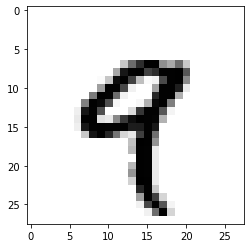

In [ ]:
# 다섯번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

#### 2.2.6 넘파이로 텐서 조작하기
- 슬라이싱(slicing) : 배열에 있는 특정 원소들을 선택하는 것


In [ ]:
# 11~100번째까지 숫자를 선택
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


#### 2.2.7 배치 데이터
- 샘플 축(sample axis) : 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플을 나타내는 축이다. 샘플 차원(sample dimension)이라고도 부른다.

- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않고, 작은 배치(batch)로 나누어 처리한다.
- 이런 배치 데이터를 다룰 때 첫번째 축을 배치 축(batch axis), 배치 차원(batch dimension)이라고 부른다. 

#### 2.2.8 텐서의 실제 사례
- 벡터 데이터 : (sample, features)
  - 첫번째 축은 샘플 축, 두 번째 축은 특성 축이 된다. 
- 시계열 데이터, 시퀀스 데이터 : (samples, timesteps, features)
  - 관례적으로 시간 축은 두 번째 축이 된다.
- 이미지 : (samples, height, width, channels), (samples, channels, height, width)
  - channel-last 방식과 channel-first 방식이 있다. 케라스 설정 파일에서 image_data_format 옵션을 수정하여 지정할 수 있다. 
- 동영상 : (samples, frames, height, width, channels), (samples, frames, channels, height, width)

### 2.3 신경망의 톱니바퀴: 텐서 연산

- 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하기 위해 `텐서 연산(tensor operation)`을 사용한다.

- 예를 들어 아래의 첫 번째 코드에서 dense 층을 쌓는 과정은 두 번째 코드에서의 계산을 시행하는 것과 같다.


```
keras.layers.Dense(512, activation = 'relu')
```
```
output = relu(dot(W, input) + b)
```



#### 2.3.1 원소별 연산
- `원소별 연산(element-wise operation)` : 텐서에 있는 각 원소에 독립적으로 적용된다. 즉, 병렬 구현이 가능하다.
- 아래에는 for문으로 relu함수와 덧셈을 구현한 코드이다.

##### (python) assert [조건], [오류메세지]

- [조건]이 true이면 코드가 진행되고, false이면 asserionerror가 발생하며 [오류메세지]를 출력한다. [오류메세지]는 생략 가능하다. 

In [ ]:
# relu
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy() # 파이썬의 함수는 수정가능한 데이터 타입일 경우 참조에 의한 호출처럼 작동하기 때문에 입력 배열 원본을 변경하지 않도록 복사하여 사용한다.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] = max(x[i,j], 0)
  return x

In [ ]:
# add
def naive_add(x,y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i, j]
  return x

In [ ]:
# 넘파이 내장 함수를 이용하여 위의 과정을 시행할 수 있다.
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
y = np.array([[8,9,0],[3,4,5]])

z = x + y # add
z = np.maximum(z, 0.) # 원소별 relu 함수

#### 2.3.2 브로드 캐스팅

- 크기가 다른 두 텐서가 더해질 때 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 `브로드캐스팅(broadcasting)`된다.
- 이 과정은 메모리 수준이 아니라 알고리즘 수준에서 구현된다.



1. 큰 텐서의 ndim 에 맞도록 작은 텐서에 브로드캐스팅 축이 추가된다.
2. 작은 텐서가 새 축을 따라 큰 텐서의 크기에 맞도록 반복된다.

In [ ]:
# 구현
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2 # x는 2D 넘파이 배열임
  assert len(y.shape) == 1 # y는 넘파이 벡터임
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x

In [ ]:
# maximum 예시
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x, y)

print(z.ndim)
print(z.shape)

4
(64, 3, 32, 10)


#### 2.3.3 텐서 점곱

- 텐서 곱셈(tensor product) : 행렬 곱. 책의 설명보다는 기존의 행렬 곱으로 생각하는게 이해가 수월한 것 같음.

In [ ]:
# 벡터 곱
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [ ]:
# 행렬-벡터 곱
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i,:], y)
  return z

In [ ]:
# 행렬-행렬 곱
def naive_matrix_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

#### 2.3.4 텐서 크기 변환
- `텐서 크기 변환(tensor reshaping)`
- 특정 크기에 맞게 열과 행을 재배열


In [ ]:
#
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print(x.shape)

x = x.reshape((6,1))
print(x.shape)
x

(3, 2)
(6, 1)


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x.reshape((2,3))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

#### 2.3.5 텐서 연산의 기하학적 해석
#### 2.3.6 딥러닝의 기하학적 해석

- 신경망은 전체적으로 텐서 연산의 연결로 구성됨
- 모든 텐서 연산은 입력 데이터의 기하학적 변환임
- 즉, 단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석할 수 있다.

### 2.4 신경망의 엔진 : 그래디언트 기반 최적화



- 텐서 W와 b는 층의 속성으로 볼 수 있다. 즉, `가중치(weight)` 또는 `훈련되는 파라미터(trainable parameter)`라고 부른다. 각각 `커널(kernel)`과 `편향(bias)`이라고 부른다. 
- 초기에는 가중치 행렬이 작은 난수로 채워져 있다. (`무작위 초기화(random initialization)`단계)
- 이는 피드백 신호에 기초하여 가중치가 점진적으로 조정된다. 
- `훈련반복루프(training loop)`
  1. 훈련 샘플 x와 이에 상응하는 타깃 y의 배치를 추출한다.
  2. x를 사용하여 네트워크를 실행하고 (정방향 패스(forward pass)), 예측 y_pred를 구한다.
  3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산한다.
  4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트한다. 

- 4번에서 개별적인 가중치 값이 있을 때 값이 증가할지, 감소할지, 얼만큼 업데이트해야 할지 어떻게 알까?
  - 네트워크 가중치 행렬의 원소를 모두 고정하고 관심 있는 하나만 다른 값을 적용. 하지만 이런 방식은 모든 가중치 행렬의 원소마다 두 번의 정방향 패스를 계산해야 하기 때문에 비효율적이다.
  - 신경망에 사용된 모든 연산이 미분 가능(differentiable)하다는 점을 사용하여 네트워크 가중치에 대한 손실의 그래디언트를 계산하는 것이 훨씬 더 좋은 방법. 그래디언트의 반대 방향으로 가중치를 이동하면 손실이 감소된다. 

#### 2.4.1 변화율이란?

#### 2.4.2 텐서 연산이 변화율: 그래디언트
- 그래디언트 : 텐서 연산의 변화율
- x:입력벡터, W:행렬, y:타깃, loss:손실함수
- 입력 데이터 x와 y가 고정되어 있다면 이 함수는 W를 손실 값에 매핑하는 함수 loss_value = f(W)로 볼 수 있다. 
- 포인트 W0에서의 f의 변화율은 W와 같은 크기의 텐서인 gradient(f)(W0)이고, 이 텐서의 각 원소 gradient(f)(W0)[i,j]는 W0[i,j]를 변경했을 때 loss_value가 바뀌는 방향과 크기를 나타낸다. 다시 말해 텐서 gradient(f)(W0)가 W0에서 함수 f(W) = loss_value의 그래디언트이다. 
- 함수 f(W)의 입장에서 그래디언트의 반대 방향으로 W를 움직이면 f(W)의 값을 줄일 수 있다. (step: 스케일 조정을 위한 값)
  $$W1 = W0 - step * gradient(f)(W0)$$

#### 2.4.3 확률적 경사 하강법
- 실제 신경망에서는 파라미터의 개수가 수천 개보다 적은 경우가 거의 없고 종종 수천만 개가 되기 때문에 해석적으로 해결하는 것이 어렵다. 
- 랜덤한 배치 데이터에서 현재 손실 값을 토대로 하여 조금씩 파라미터를 수정. 미분 가능한 함수를 가지고 있으므로 그래디언트를 계산하여 단계 4를 효율적으로 구현한다. 그래디언트의 반대 방향으로 가중치를 업데이트하면 손실이 매번 조금씩 감소할 것 이다.

- `미니 배치 확률적 경사 하강법`
  1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출합니다.
  2. x로 네트워크를 실행하고 예측 y_pred를 구한다.
  3. 이 배치에서 y_pred와 y사이의 오차를 측정하여 네트워크의 손실을 계산한다.
  4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산한다.(역방향 패스)
  5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킨다. 


### 2.5 첫 번째 예제 다시 살펴보기